In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.19.0


In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
print("Train",x_train.shape,y_train.shape)
print("Train",x_test.shape,y_test.shape)

Train (60000, 28, 28) (60000,)
Train (10000, 28, 28) (10000,)


In [3]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train[...,tf.newaxis]
x_test=x_test[...,tf.newaxis]

print("After preprocessing")
print("Train",x_train.shape)
print("Test",x_test.shape)

After preprocessing
Train (60000, 28, 28, 1)
Test (10000, 28, 28, 1)


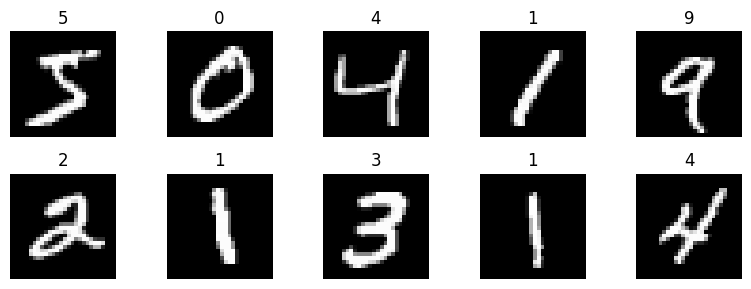

In [5]:
plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(int(y_train[i]))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.08),
    layers.RandomZoom(0.10),
    layers.RandomTranslation(0.08, 0.08),
], name="data_augmentation")

data_augmentation

<Sequential name=data_augmentation, built=False>

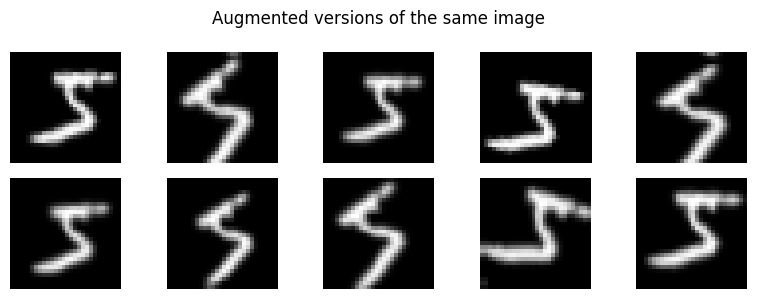

In [7]:
sample = x_train[0:1]  # one image

plt.figure(figsize=(8,3))
for i in range(10):
    augmented = data_augmentation(sample, training=True)
    plt.subplot(2,5,i+1)
    plt.imshow(augmented[0].numpy().squeeze(), cmap="gray")
    plt.axis("off")
plt.suptitle("Augmented versions of the same image")
plt.tight_layout()
plt.show()

In [8]:
def build_cnn_baseline():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        data_augmentation,
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ], name="CNN_Baseline_NoDropout")
    return model

model_a = build_cnn_baseline()
model_a.summary()

Model: "CNN_Baseline_NoDropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_a.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_a = model_a.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 117ms/step - accuracy: 0.7213 - loss: 0.8711 - val_accuracy: 0.9771 - val_loss: 0.0708
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 111ms/step - accuracy: 0.9474 - loss: 0.1781 - val_accuracy: 0.9863 - val_loss: 0.0415
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9625 - loss: 0.1201 - val_accuracy: 0.9864 - val_loss: 0.0402
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9711 - loss: 0.0944 - val_accuracy: 0.9848 - val_loss: 0.0481
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 115ms/step - accuracy: 0.9749 - loss: 0.0821 - val_accuracy: 0.9862 - val_loss: 0.0409


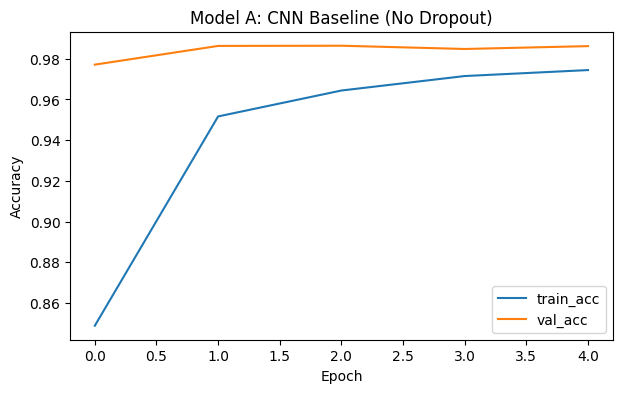

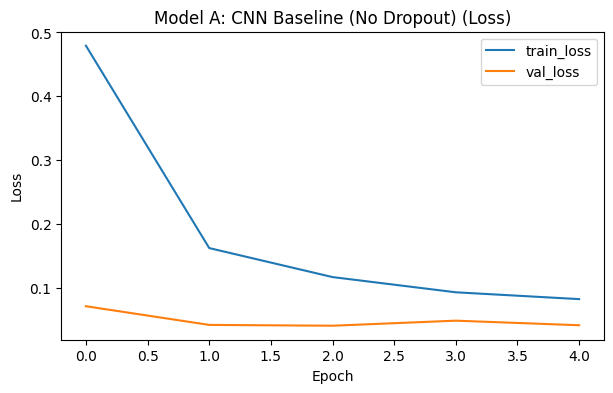

In [10]:
def plot_history(history, title):
    plt.figure(figsize=(7,4))
    plt.plot(history.history["accuracy"], label="train_acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()

    plt.figure(figsize=(7,4))
    plt.plot(history.history["loss"], label="train_loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title + " (Loss)")
    plt.legend()
    plt.show()

plot_history(history_a, "Model A: CNN Baseline (No Dropout)")

In [11]:
def build_cnn_with_dropout():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        data_augmentation,
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.50),
        layers.Dense(10, activation="softmax")
    ], name="CNN_WithDropout")
    return model

model_b = build_cnn_with_dropout()
model_b.summary()

Model: "CNN_WithDropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_b.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_b = model_b.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.6160 - loss: 1.1379 - val_accuracy: 0.9774 - val_loss: 0.0682
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 119ms/step - accuracy: 0.9015 - loss: 0.3180 - val_accuracy: 0.9807 - val_loss: 0.0580
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.9267 - loss: 0.2383 - val_accuracy: 0.9865 - val_loss: 0.0388
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 120ms/step - accuracy: 0.9379 - loss: 0.2028 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 116ms/step - accuracy: 0.9466 - loss: 0.1761 - val_accuracy: 0.9899 - val_loss: 0.0326


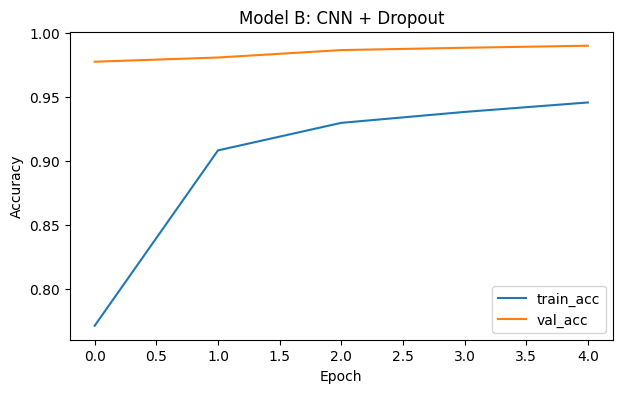

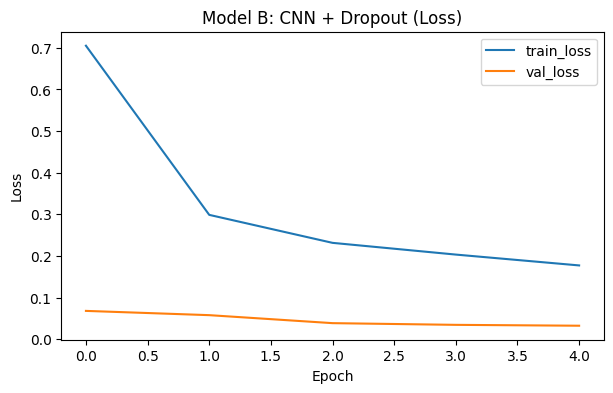

In [13]:
plot_history(history_b, "Model B: CNN + Dropout")

In [14]:
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test, verbose=0)
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test, verbose=0)

print("Model A (No Dropout)  - Test Accuracy:", round(test_acc_a, 4), " Test Loss:", round(test_loss_a, 4))
print("Model B (With Dropout) - Test Accuracy:", round(test_acc_b, 4), " Test Loss:", round(test_loss_b, 4))

Model A (No Dropout)  - Test Accuracy: 0.9862  Test Loss: 0.0409
Model B (With Dropout) - Test Accuracy: 0.9899  Test Loss: 0.0326


Predictions using Model B (Dropout):


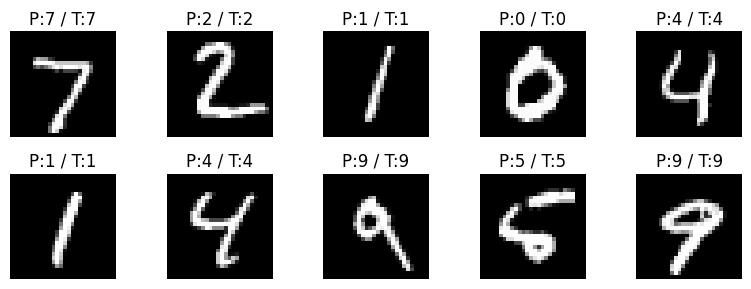

In [15]:
def show_predictions(model, x, y, n=10):
    preds = model.predict(x[:n], verbose=0)
    pred_labels = np.argmax(preds, axis=1)

    plt.figure(figsize=(8,3))
    for i in range(n):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i].squeeze(), cmap="gray")
        plt.title(f"P:{pred_labels[i]} / T:{y[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

print("Predictions using Model B (Dropout):")
show_predictions(model_b, x_test, y_test, n=10)